<a href="https://colab.research.google.com/github/AreejShareefi/InformationRetrieval-/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from __future__ import print_function
from nltk.metrics import *
Sentence1= "There are many similarity measures used in NLTK package".split()
Sentence2= "There are many similarity measures are available in NLTK".split()
print(accuracy(Sentence1,Sentence2))
setSentence1=set(Sentence1)
setSentence2=set(Sentence2)

precision=precision(setSentence1,setSentence2)
recall=recall(setSentence1,setSentence2)

print('precision = ',precision)
print('recall = ',recall)

f_measure=(2*precision*recall) / (precision+recall)
print('f_measure = ',f_measure)

0.5555555555555556
precision =  0.875
recall =  0.7777777777777778
f_measure =  0.823529411764706


In [12]:
from sklearn.metrics import classification_report 

print(classification_report(Sentence1,Sentence2))

              precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   available       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        many       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
     package       0.00      0.00      0.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

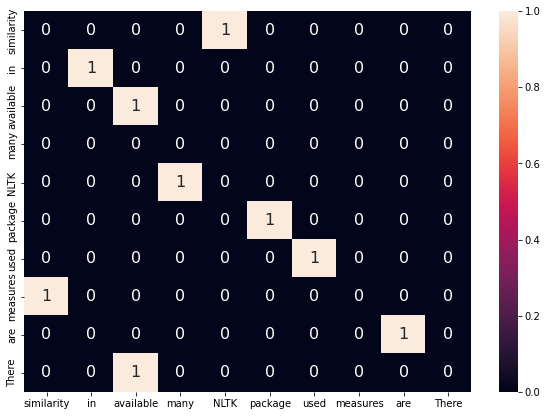

In [19]:
import seaborn as sn 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
col1=set(Sentence1)
col2=set(Sentence2)
dic=col1.union(col2)
array=confusion_matrix(Sentence1,Sentence2)
df_cm = pd.DataFrame(array ,index=dic,columns=dic)
df_cm
plt.figure(figsize = (10,7)) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 

In [23]:
def _edit_dist_init(len1,len2):
  lev=[]
  for i in range(len1):
    lev.append([0]*len2)
  for i in range(len1):
    lev[i][0]=i
  for j in range(len2):
    lev[0][j] =j
  return lev  

In [24]:
def _edit_dist_step(lev,i,j,s1,s2,transpositions=False):
  c1=s1[i-1]
  c2=s2[j-1]
  
  a=lev[i-1][j]+1
  b=lev[i][j-1]+1
  c=lev[i-1][j-1]+(c1!=c2)
  d=c+1
  if transpositions and i>1 and j>1:
    if s1[i-2]==c2 and s2[j-2]==c1:
      d=lev[i-2][j-2]+1
    lev[i][j]=min(a,b,c,d)  

In [25]:
def edit_distance(s1,s2,transpositions=False):
  len1=len(s1)
  len2=len(s2)
  lev=_edit_dist_init(len1+1,len2+1)

  for i in range(len1):
    for j in range(len2):
      _edit_dist_step(lev,i+1,j+1,s1,s2,transpositions=transpositions)
  return lev[len1][len2]    

dis=  edit_distance("relate","relation")
print(dis)


0


In [22]:
def jacc_similarity(query,doc):
  first=set(query).intersection(set(doc))
  second=set(query).union(set(doc))
  return len(first)/len(second)

X=set(Sentence1) 
Y=set(Sentence2) 
print(jacc_similarity(X, Y) )

0.7


In [20]:
def binary_distance(label1, label2):
  return 0.0 if label1 == label2 else 1.0

import nltk 
from nltk.metrics import * 
X=set(Sentence1) 
Y=set(Sentence2) 
binary_distance(X, Y)

1.0

In [21]:
def masi(label1, label2):
  len_intersection = len(label1.intersection(label2)) 
  len_union = len(label1.union(label2)) 
  len_label1 = len(label1) 
  len_label2 = len(label2) 
  if len_label1 == len_label2 and len_label1 == len_intersection:
    m = 1
  elif len_intersection == min(len_label1, len_label2): 
    m = 0.67
  elif len_intersection > 0: 
    m = 0.33
  else:
    m = 0
  return 1 - (len_intersection / float(len_union)) * m
  
   
X=set([10,20,30,40]) 
Y=set([30,50,70]) 
masi(X, Y) 



0.945